In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions


#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np

#plots
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi


#misc

np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

In [4]:
pd.read_hdf(dir + 'NotWindy.h5')

,master_time,xsrc,ysrc,odor,trisonica_u,trisonica_v,trisonica_pressure,trisonica_temperature,gps_linear_x,gps_linear_y,...,time,corrected_u,corrected_v,distance_from_source,eastwest,northsouth,nearest_from_streakline,odorsim,relative_parallel_comp,relative_perpendicular_comp
0,1.603220e+09,0.936368,-0.789034,0.673029,-1.298234,-0.661766,885.900024,7.394513,0.001117,0.033848,...,0.000000,-0.371148,1.077891,1.224483,-232.750098,4963.421379,1.224483,0,0.000000,0.000000
1,1.603220e+09,0.936368,-0.789034,0.672322,-1.410287,-0.458977,885.800011,7.477088,0.023118,0.005347,...,0.100003,-0.408539,1.064282,1.224483,-232.712983,4963.313587,1.224483,0,-1.141776,0.063385
2,1.603220e+09,0.936390,-0.789034,0.673746,-1.152428,-0.439935,885.899399,7.600556,0.044806,-0.022949,...,0.200006,-0.333738,1.027141,1.224501,-232.672128,4963.207155,1.224501,0,-1.116001,-0.022917
3,1.603220e+09,0.940609,-0.789138,0.677795,-1.556979,-0.357618,885.801314,8.050777,0.008805,-0.013448,...,0.300008,-0.338591,0.983339,1.227796,-232.638753,4963.104439,1.227796,0,-1.055353,0.022368
4,1.603220e+09,0.944801,-0.789241,0.676133,-1.365850,-0.373108,885.898466,7.455672,-0.026923,-0.004066,...,0.400011,-0.239503,0.960593,1.231077,-232.604893,4963.006102,1.231077,0,-0.981312,-0.113064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,1.603229e+09,46.832805,-32.911139,0.753223,0.633675,0.063676,883.599976,14.719487,-0.002818,0.005291,...,7199.699113,1.434997,0.900118,57.240324,0.662597,0.383776,52.377165,0,1.687367,-0.144283
71996,1.603229e+09,46.837024,-32.911243,0.753649,0.729799,0.050604,883.599976,14.623065,0.007183,0.015792,...,7199.799116,1.341613,0.743668,57.243836,0.519093,0.293762,52.398806,0,1.519442,-0.042490
71997,1.603229e+09,46.839431,-32.910089,0.755508,0.586856,0.020000,883.599976,15.345691,0.012490,0.020071,...,7199.899119,1.226582,0.731278,57.245142,0.384928,0.219393,52.404835,0,1.405289,-0.070702
71998,1.603229e+09,46.835349,-32.904435,0.754988,0.500692,0.056870,883.599976,15.813213,0.000989,0.002070,...,7199.999122,1.250160,0.831210,57.238551,0.262267,0.146263,52.407735,0,1.490830,-0.159140


### Load Dataset

In [2]:
dir='../../data/'
fdf1 = pd.read_hdf(dir+"NotWindyStatsTime_std.h5")
fdf2 = pd.read_hdf(dir+"WindyStatsTime_std.h5")
# fdf3 = pd.read_hdf(dir+"Forest/ForestStatsTime_std.h5")

fdf = pd.concat([fdf1,fdf2])
fdf.reset_index(inplace=True, drop=True)

In [3]:
fdf

,avg_dist_from_source,log_avg_dist_from_source,avg_xsign,avg_dist_from_streakline,log_avg_dist_from_source_signed,mean_concentration,avg_parallel_encounter,avg_perpendicular_encounter,avg_parallel_intermittency,avg_perpendicular_intermittency,...,log_whiff,log_blank,speed_at_intermittency,speed_at_encounter,mean_ef,mean_ma,mean_time,type,std_whiff,whiff_ma
0,0.628018,-0.202028,1.0,0.556452,-0.202028,6.635650,0.564198,0.772177,0.699846,0.428177,...,-0.979215,-1.301434,0.415895,0.406772,0.487722,0.0600,185.382288,0.0,0.776564,1.348667
1,0.582182,-0.234941,1.0,0.490430,-0.234941,5.919642,0.549601,0.118679,0.534339,0.102399,...,-1.456336,-1.824313,0.417641,0.417005,0.956721,0.1400,185.497181,0.0,0.895035,0.873382
2,0.567026,-0.246397,1.0,0.483987,-0.246397,4.750747,0.572934,0.152219,0.204679,0.053819,...,-1.699374,0.678114,0.091945,0.418256,1.437090,0.1775,185.534646,0.0,0.218329,0.705960
3,0.336987,-0.472387,1.0,0.243405,-0.472387,10.054841,0.007186,-0.215654,0.243405,-0.222533,...,-0.796284,-1.824313,0.100185,0.040283,0.481141,0.0775,190.385127,0.0,0.984515,5.619581
4,0.327123,-0.485289,1.0,0.282109,-0.485289,9.193018,0.329041,0.009585,0.293736,0.211309,...,-1.022681,-0.475360,0.186917,0.134557,0.938057,0.2050,190.522499,0.0,1.787478,5.732557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359,4.252152,0.628609,1.0,0.328890,0.628609,5.413627,6.805281,-0.240901,6.814407,-0.246638,...,-2.301331,-2.000301,1.209502,1.206188,0.933637,0.0000,2424.500192,0.0,0.000000,4.351927
6360,4.212280,0.624517,1.0,0.337019,0.624517,9.474056,6.925562,-0.271032,7.065426,-0.280028,...,-1.301331,-1.456233,1.299395,1.249360,1.413045,0.0000,2424.532669,0.0,1.624751,4.103465
6361,4.131861,0.616146,1.0,0.355517,0.616146,8.002565,7.149855,-0.353938,7.150689,-0.450595,...,-1.699271,-2.000301,1.343872,1.334747,1.865992,0.0000,2424.597624,0.0,2.278855,3.872145
6362,4.065270,0.609089,1.0,0.385064,0.609089,8.833586,7.109031,-0.915656,7.065454,-1.258622,...,-1.222150,-1.824210,1.396256,1.370979,2.317760,0.0000,2424.642593,0.0,1.518321,3.363259


In [3]:
colormap='bone_r'

### Load Figure Layout

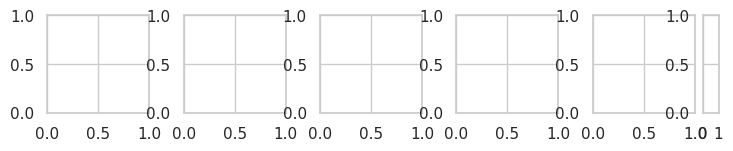

In [3]:
layout = fifi.svg_to_axes.FigureLayout('../../Figure/figOSindi.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Whiff Concentration

In [28]:
ax=layout.axes[('fig1','ax1')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_concentration, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
# ax.set_ylim(4,10)
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_concentration", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wc, v')
ax.yaxis.set_label_coords(-0.08, 0.5)

ax.set_xlabel('Distance from\nSource, m')
ax.xaxis.set_label_coords(0.5, -0.1)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[-1,1.8],
                            yticks=[4.5,10.5],
                            linewidth=0.5)

ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])


# ax.set_yticklabels(['0','10'])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')

### Whiff Frequency

In [29]:
ax=layout.axes[('fig1','ax2')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_ef, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wf, Hz')
ax.yaxis.set_label_coords(-0.08, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,8],
                            linewidth=0.5)



figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')

### Whiff Duration

In [30]:
ax=layout.axes[('fig1','ax3')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.length_of_encounter, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="log_whiff", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wd, s')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,6],
                            linewidth=0.5)

# ax.set_yticklabels([r'$10^{-2.5}$',r'$10^{1.5}$'])
ax.tick_params(axis='y', which='major', pad=1)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')

### Whiff Moving Average

In [31]:
ax=layout.axes[('fig1','ax4')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.whiff_ma, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
ax.set_ylim(0,)

ax.set_rasterization_zorder(-20)

ax.set_ylabel('wma, v')
ax.yaxis.set_label_coords(-0.08, 0.5)


mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,10.5],
                            linewidth=0.5)

# ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')

### Whiff Standard Deviation

In [32]:
ax=layout.axes[('fig1','ax5')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.std_whiff, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

ax.set_rasterization_zorder(-20)

ax.set_ylabel('wsd')
ax.yaxis.set_label_coords(-0.08, 0.5)



mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,3],
                            linewidth=0.5)

ax.set_yticklabels(['0','2.5'])


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')

### Colorbar

In [33]:
ax = layout.axes[('fig1', 'cbar')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc, v",rotation=90, labelpad=-20)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure/figOSindi.svg')